<a href="https://colab.research.google.com/github/kindaa/ML-Group-project/blob/main/titanic_survival_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML GROUP project(group B, group 6)**

***Importing libraries***

In [ ]:
#Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


#Model evaluation
from sklearn.model_selection import cross_val_score

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Warnings for imports
import warnings
warnings.filterwarnings('ignore')

***Importing datasets***

In [ ]:
#mounting drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Titanic project/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Titanic project/test.csv')
ss=pd.read_csv('/content/drive/MyDrive/Titanic project/gender_submission.csv')

***Undesrstanding the shape of the data***

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
ss.shape

(418, 2)

The only difference between the shape of train and test data sets is the Survived column in the train dataset.

In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

***Data description***

Survived: 0 - Did not surivved ; 1 - Survived
Pclass: 1 - First class ; 2 - Second class ; 3 - Third Class
Sex: Male or Female
Age: In years
SibSp: Number of siblings or spouses on Titanic
Parch: Number of parents or children on Titanic
Ticket: Passenger's ticket number
Fare: Passenger's fare
Cabin: Cabin number
Embarked: Point of embarkation C = Cherbourg ; Q = Queenstown ; S = Southampton

***EDA***

In [ ]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Cabin, Age and Embarked have missing values in train dataset
Cabin, Age and Fare have missing values in test dataset

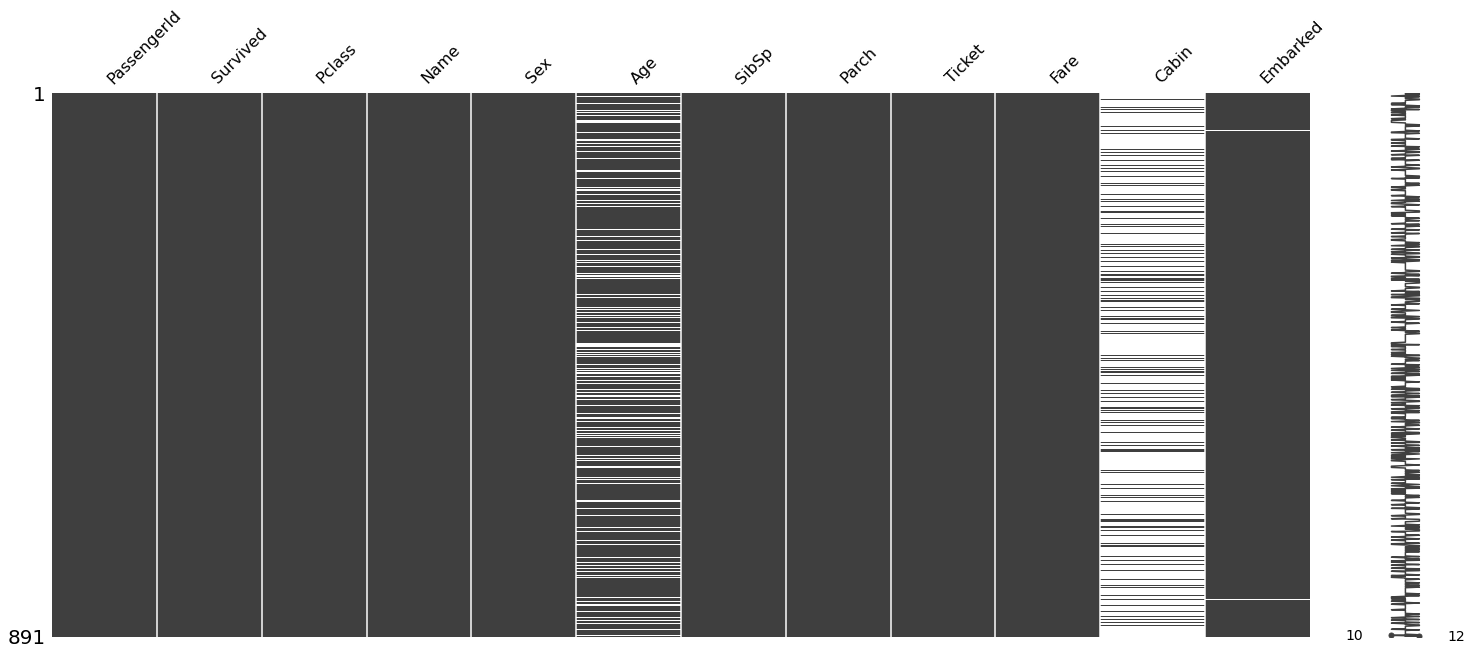

In [ ]:
import missingno
from collections import Counter
missingno.matrix(train)

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


***Feature analysis***

Knowing which feature is numerical and which categorical helps us structure analysis more properly. 

Categorical - Sex, Pclass and Embarked

Numerical - SibSp, Parch, Age and Fare

In [ ]:
train['Sex'].value_counts(dropna=False)
#There were more male passengers than female

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)
#Females had more probability than male to survive

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival probability by gender')

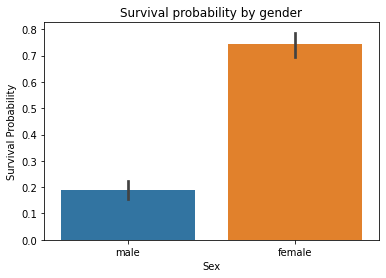

In [ ]:
#Survival probability barplot by gender
sns.barplot(x='Sex', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival probability by gender')

In [ ]:
train['Pclass'].value_counts(dropna=False)
#Most of passengers were in third class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
#Mean of survival rate by passenger class
train[['Pclass','Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)
#The better class the better survival probability

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival mean by passenger class')

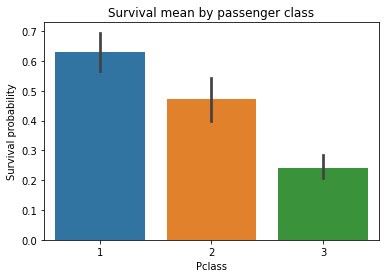

In [ ]:
#Survival rate by passenger class barplot
sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel('Survival probability')
plt.title('Survival mean by passenger class')


Text(0.5, 1.0, 'Survival probability by sex and passenger class')

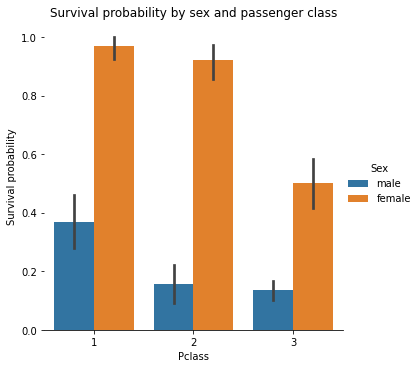

In [ ]:
# Survival probability by sex and passenger class
t=sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')
t.despine(left=True)
plt.ylabel("Survival probability")
plt.title("Survival probability by sex and passenger class")

In [ ]:
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
#Mean of survival by point of embarkation
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival probability by point of embarktion')

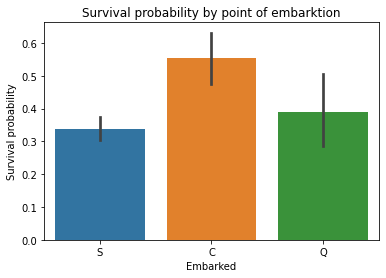

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.ylabel('Survival probability')
plt.title('Survival probability by point of embarktion')
#Survival probabilty is the highest for Cherbourg

Let's make comparison between embarkation point and class because maybe the majority of Cherbourg's passengers were in first class. (it doesn't seem logical that passengers from any point were priortised during the evacuation)


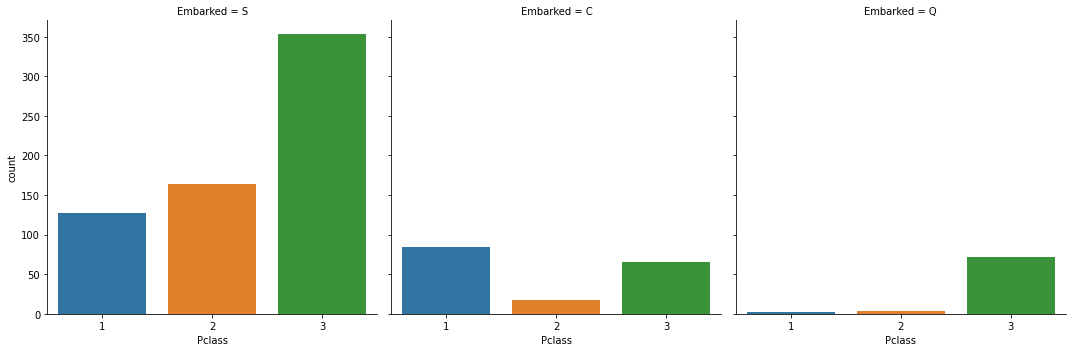

In [ ]:
sns.factorplot('Pclass', col='Embarked', data=train, kind='count')

Most of Cherbourg's passengers were in the first class. On the other hand most of passengers from Southtampton were in third class. This explains that class matters not point of embarktion when it comes to the mean of survival.

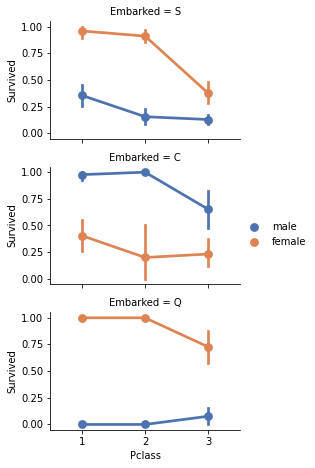

In [ ]:
#Survival rate by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

***Outliers detecting and removing***
Turey's rule
Outliers are the values more than 1.5 times the interquartiel range from the quartiles - either Q1-1.5IQR or above Q3+1.5IQR.
We will use these as part of writing a function to indentify outliers according to Tukey's rule.

In [ ]:
 def detect_outliers(df,n,features):
        outlier_indices=[]
        for col in features:
            Q1=np.percentile(df[col], 25)
            Q3=np.percentile(df[col], 75)
            IQR=Q3-Q1
            outlier_step=1.5*IQR
            outlier_list_col=df[(df[col]<Q1-outlier_step) | (df[col]>Q3+outlier_step)].index
            outlier_indices.extend(outlier_list_col)
        outlier_indices=Counter(outlier_indices)
        multiple_outliers=list(key for key, value in outlier_indices.items() if value>n)
        return multiple_outliers
outliers_to_drop=detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [ ]:
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
#drop outliers and reset index
print("Before: {} rows".format(len(train)))
train=train.drop(outliers_to_drop, axis=0).reset_index(drop=True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


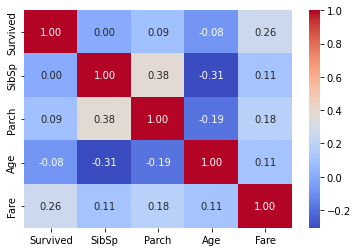

In [ ]:
#Numerical variables correlation with survival
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [ ]:
train['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [ ]:
#Survival mean by SibSp
train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival mean by SibSp')

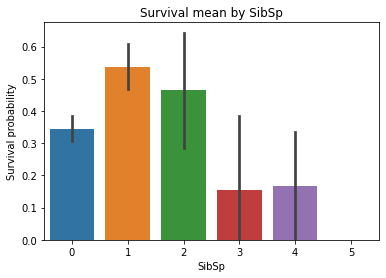

In [ ]:
sns.barplot(x='SibSp', y='Survived', data=train)
plt.ylabel('Survival probability')
plt.title("Survival mean by SibSp")

In [ ]:
train['Parch'].value_counts(dropna=False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
#Mean of survival by Parch
train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival rate by Parch')

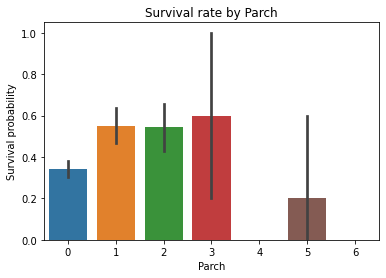

In [ ]:
sns.barplot(x='Parch', y='Survived', data=train)
plt.ylabel('Survival probability')
plt.title('Survival rate by Parch')

In [ ]:
#Null values in Age column
train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger age distribution')

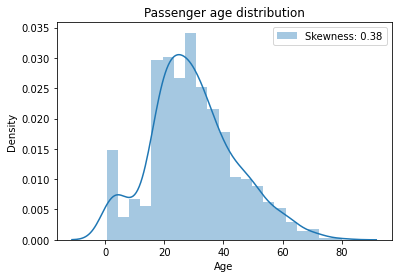

In [ ]:
#Passenger age distribution
sns.distplot(train['Age'], label='Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')
plt.title('Passenger age distribution')

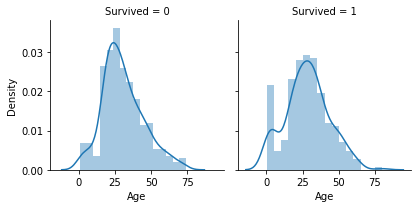

In [ ]:
# Age distribution by survival

t = sns.FacetGrid(train, col = 'Survived')
t.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Age distribution by Survival outcome')

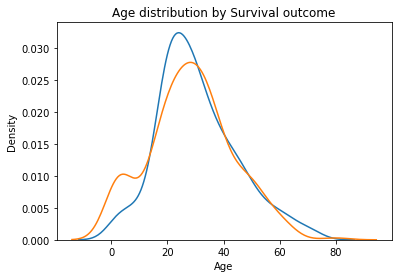

In [ ]:
sns.kdeplot(train['Age'][train['Survived']==0], label='Did not survive')
sns.kdeplot(train['Age'][train['Survived']==1], label='Survived')
plt.xlabel('Age')
plt.title('Age distribution by Survival outcome')

In [ ]:
train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger fare distribution')

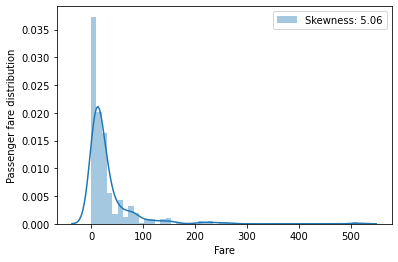

In [ ]:
#Passenger fare distribution
sns.distplot(train['Fare'], label='Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc='best')
plt.ylabel('Passenger fare distribution')

***Data preprocessing***

Dropping and filling missing values

In [ ]:
#Drop ticket and cabin features from training and test set for simplicity
train=train.drop(['Ticket', 'Cabin'], axis=1)
test=test.drop(['Ticket', 'Cabin'], axis=1)

In [ ]:
train.isnull().sum().sort_values(ascending=False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
#Compute the most frequent value of embarked in training set
mode=train['Embarked'].dropna().mode()[0]
mode

'S'

In [ ]:
#Fill missing value in embarked with mode
train['Embarked'].fillna(mode,inplace=True)

In [ ]:
test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [ ]:
median=test['Fare'].dropna().median()
median

14.4542

In [ ]:
test['Fare'].fillna(median, inplace=True)

In [ ]:
combine=pd.concat([train,test], axis=0).reset_index(drop=True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
#Missing values in combined dataset
combine.isnull().sum().sort_values(ascending=False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [ ]:
#Converting sex into numerical values ; 0=male 1=female
combine['Sex']=combine['Sex'].map({'male':0,'female':1})

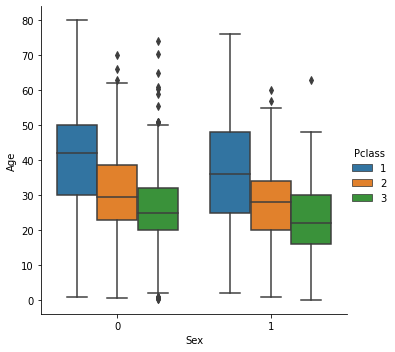

In [ ]:
sns.factorplot(y='Age', x='Sex', hue='Pclass', kind='box', data=combine)

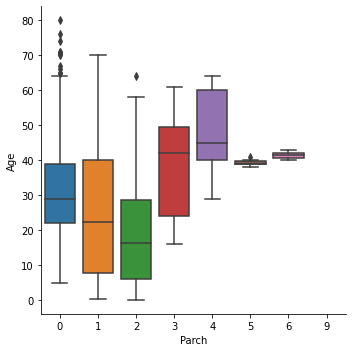

In [ ]:
sns.factorplot(y='Age', x='Parch', kind='box', data=combine)

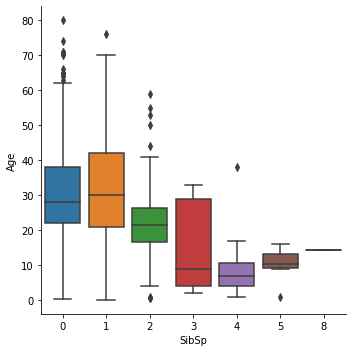

In [ ]:
sns.factorplot(y='Age', x='SibSp', kind='box', data=combine)

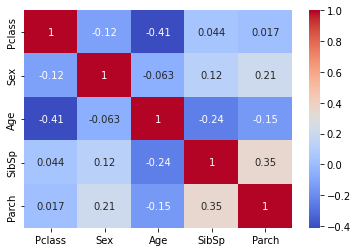

In [ ]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis=1).corr(),annot=True, cmap='coolwarm')

In [ ]:
#Age is not correlated with sex but slightly negatively correlated to SibSp, Parch and Pclass

In [ ]:
age_nan=list(combine[combine['Age'].isnull()].index)
len(age_nan)

256

In [ ]:
#Loop through list and impute missing ages
for index in age_nan:
    median_age=combine['Age'].median()
    predict_age=combine['Age'][(combine['SibSp']==combine.iloc[index]['SibSp'])
        &(combine['Parch']==combine.iloc[index]['Parch'])
        &(combine['Pclass']==combine.iloc[index]['Pclass'])].median()
    
    if np.isnan(predict_age):
        combine['Age'].iloc[index]=median_age
    else:
        combine['Age'].iloc[index]=predict_age

In [ ]:
combine['Age'].isnull().sum()

0

Data Transformation

Text(0.5, 1.0, 'Passenger Fare distribution')

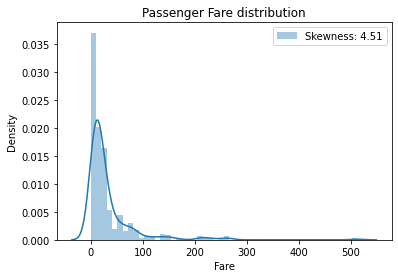

In [ ]:
#Passenger fare distribution
sns.distplot(combine['Fare'],label='Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passenger Fare distribution')

In [ ]:
#Apply log transformation to fare column to reduce skewness
combine['Fare']=combine['Fare'].map(lambda x: np.log(x) if x>0 else 0)

Text(0.5, 1.0, 'Passenger fare distribution after log transformation')

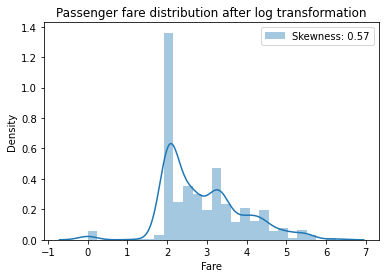

In [ ]:
sns.distplot(combine['Fare'], label='Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc='best')
plt.title("Passenger fare distribution after log transformation")

**Feature Engineering**

In [ ]:
combine['Title']=[name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [ ]:
combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [ ]:
 combine['Title'].nunique()

18

In [ ]:
combine['Title']=combine['Title'].replace(['Dr', 'Rev','Col', 'Major', 'Lady', 'Jonkheer', 'Don','Capt','the Countess', 'Sir', 'Dona'],'Rare')
combine['Title']=combine['Title'].replace(['Mlle','Ms'],'Miss')
combine['Title']=combine['Title'].replace('Mme', 'Mrs')

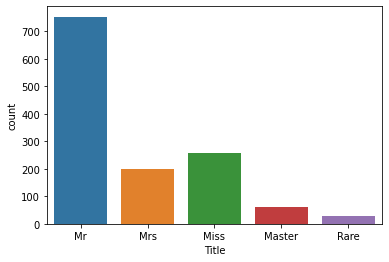

In [ ]:
sns.countplot(combine['Title'])

In [ ]:
combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

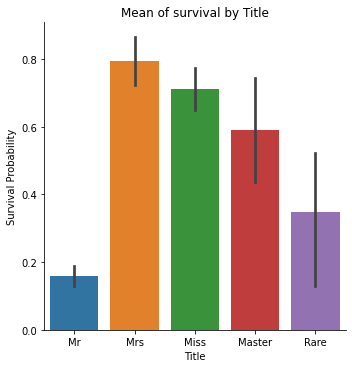

In [ ]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [ ]:
#Dropping name column - unnecessary one
combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [ ]:
#Family size calculation
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [ ]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [ ]:
# Creating IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [ ]:
combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [ ]:
# Dropoing SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


In [ ]:
# In order to create Age Class feature we need to trasform Age into ordinal variable.
#We will separate Age into 5 age groups and assign a number to each age groups.

combine['AgeGroup'] = pd.cut(combine['Age'], 5)
combine[['AgeGroup', 'Survived']].groupby('AgeGroup', as_index=False).mean().sort_values(by = 'AgeGroup')

,AgeGroup,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [ ]:
# Assign ordinals to each age group 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [ ]:
# Dropping age band feature

combine = combine.drop('AgeGroup', axis = 1)

In [ ]:
combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [ ]:
combine['Age']=combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

In [ ]:
#Create Age*Pclass variable
combine['AgePclass']=combine['Age']*combine['Pclass']
combine[['Age','Pclass','AgePclass']].head()

,Age,Pclass,AgePclass
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


**FEATURE ENCODING**

As ML models require all the inputs and outputs variables to be numeric we need to encode all categorical data before we can fit the date to our models.

We already have encoded sex column where 0=female and 1=male. We need to do the same process for Title and Embarked. In addition, similar to the age column, we'll need to transform fare into an ordinal variable rather than conrinuous variable.

In [ ]:
combine=pd.get_dummies(combine,columns=['Title'])
combine=pd.get_dummies(combine, columns=['Embarked'], prefix='Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,AgePclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [ ]:
combine['FareGroup']=pd.cut(combine['Fare'],4)
combine[['FareGroup','Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup')

,FareGroup,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


The higher fare the better chances for surviving

In [ ]:
#Assign ordinal to each fare band
combine.loc[combine['Fare']<=1.56, 'Fare']=0
combine.loc[(combine['Fare']>1.56) & (combine['Fare']<=3.119), 'Fare']=1
combine.loc[(combine['Fare']>3.110) & (combine['Fare']<=4.678),'Fare']=2
combine.loc[combine['Fare']>4.678, 'Fare']=3

In [ ]:
combine['Fare']=combine['Fare'].astype('int')

In [ ]:
combine=combine.drop('FareGroup', axis=1)

In [ ]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,AgePclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [ ]:
train=combine[:len(train)]
test=combine[len(train):]

In [ ]:
combine.info()
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1299 non-null   int64  
 1   Survived      881 non-null    float64
 2   Pclass        1299 non-null   int64  
 3   Sex           1299 non-null   int64  
 4   Age           1299 non-null   int64  
 5   Fare          1299 non-null   int64  
 6   IsAlone       1299 non-null   int64  
 7   AgePclass     1299 non-null   int64  
 8   Title_Master  1299 non-null   uint8  
 9   Title_Miss    1299 non-null   uint8  
 10  Title_Mr      1299 non-null   uint8  
 11  Title_Mrs     1299 non-null   uint8  
 12  Title_Rare    1299 non-null   uint8  
 13  Em_C          1299 non-null   uint8  
 14  Em_Q          1299 non-null   uint8  
 15  Em_S          1299 non-null   uint8  
dtypes: float64(1), int64(7), uint8(8)
memory usage: 91.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entr

In [ ]:
train=train.drop('PassengerId', axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,AgePclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [ ]:
#Converting survived back to integer in train dataset
train['Survived']=train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,AgePclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,AgePclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [ ]:
#Dropping survived column from test datasset
test=test.drop('Survived', axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,AgePclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


**ML MODELLING**
In order to train our data and make predictions we'll need to use classification models for the Titanic dataset.
SVM is our chosen classifier.


**Splitting training data**

First, we need to split the training data into independent variables, represented by X and the dependent variable represented by Y.

Y_train is the survived column in the training set
X_train are the other columns in the trainng set without Survived columnn. 
Our model will learn to classify survival, Y_train based on all X_train and make a prediction on X_test.

In [ ]:
X_train=train.drop('Survived', axis=1)
Y_train=train['Survived']
X_test=test.drop("PassengerId", axis=1).copy()

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


**Fit data to model and make predictions**

Step 1: Instantiate the model

Step 2: Fitting the training data to the training set

Step 3: Predict the test set

In [ ]:
#SVM
svc=SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100,2)
acc_svc

83.09

**Model evaluation + hyperparameter tuning**

After training our model, the next step is to assess the performance of the model and select one which has the highest prediction accuracy

**Training accuracy**

Training accuracy shows how well the model has learned from the training set.

In [ ]:
models = pd.DataFrame({'Model': ['Support Vector Machines'],
                       'Score': [acc_svc]})



**K-Fold Cross Validation**


In [ ]:
# Classifier 

classifiers = []
classifiers.append(SVC())


len(classifiers)

1

In [ ]:
# Creating a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

In [ ]:
cv_mean=[]
cv_std=[]
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [ ]:
param_grid={'C':[0.1, 1,10,100,100],
           'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}
grid=GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [ ]:
#Training accuracy
svc=SVC(C=100, gamma=0.01, kernel='rbf')
svc.fit(X_train, Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train, Y_train)*100,2)
acc_svc

83.54

In [ ]:
# Cross Validation Mean Score
cross_val_score(svc, X_train, Y_train, scoring='accuracy', cv=10).mean()

0.8297242083758938

In [ ]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
len(Y_pred)

418

***Data submission***

In [ ]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
ss.shape

(418, 2)

In [ ]:
submit_data=pd.DataFrame({'PassengerId': test['PassengerId'],
                        'Survived':Y_pred})
submit_data.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [ ]:
submit_data.shape

(418, 2)

In [ ]:
submit_data.to_csv("subimission.csv", index=False)
